# <u>Business Understanding<u>

## Business Problem
My client,SyriaTel is losing customers and thus they want to know which customers are likely to stop doing business with them. This research will help them make the right decisions to retain customers.

## Stakeholder
SyriaTel's management and marketing teams are the stakeholders who will use this analysis to reduce churn rates.

## Key Objective
Build a machine learning model to predict customer churn and provide insights on:
1. Which factors influence churn the most.
2. How SyriaTel can target at-risk customers to retain them.


In [26]:
import pandas as pd

# Load the dataset
file_path = 'syriatel.csv'
data = pd.read_csv(file_path)

# <u>information about the dataset<u>

In [8]:
print("Dataset Overview")
data.info()

Dataset Overview
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls      

In [7]:
print("\nSummary Statistics")
data.describe().T


Summary Statistics


,count,mean,std,min,25%,50%,75%,max
account length,3333.0,101.064806,39.822106,1.00,74.00,101.00,127.00,243.00
area code,3333.0,437.182418,42.371290,408.00,408.00,415.00,510.00,510.00
number vmail messages,3333.0,8.099010,13.688365,0.00,0.00,0.00,20.00,51.00
total day minutes,3333.0,179.775098,54.467389,0.00,143.70,179.40,216.40,350.80
total day calls,3333.0,100.435644,20.069084,0.00,87.00,101.00,114.00,165.00
total day charge,3333.0,30.562307,9.259435,0.00,24.43,30.50,36.79,59.64
total eve minutes,3333.0,200.980348,50.713844,0.00,166.60,201.40,235.30,363.70
total eve calls,3333.0,100.114311,19.922625,0.00,87.00,100.00,114.00,170.00
total eve charge,3333.0,17.083540,4.310668,0.00,14.16,17.12,20.00,30.91
total night minutes,3333.0,200.872037,50.573847,23.20,167.00,201.20,235.30,395.00


In [5]:
print("\nSample Data")
data.head()


Sample Data


,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


# Data Preparation.

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [29]:
# Drop irrelevant columns like the phone number column because it is not predictive
clean_data = data.drop(columns=['phone number'])
clean_data.head()

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [30]:
# Encode categorical variables
encoder = LabelEncoder()
clean_data['international plan'] = encoder.fit_transform(clean_data['international plan'])
clean_data['voice mail plan'] = encoder.fit_transform(clean_data['voice mail plan'])
clean_data['state'] = encoder.fit_transform(clean_data['state'])

In [31]:
# Define features and target
X = clean_data.drop(columns=['churn'])
y = clean_data['churn']

In [32]:
# Scale numerical features
scaler = StandardScaler()
X_scaled = X.copy()
numeric_features = X.select_dtypes(include=['float64', 'int64']).columns
X_scaled[numeric_features] = scaler.fit_transform(X[numeric_features])

In [33]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42, stratify=y)
print(f"Training Set: {X_train.shape}, Test Set: {X_test.shape}")

Training Set: (2333, 19), Test Set: (1000, 19)


# Baseline Model

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score

In [34]:
# Train a logistic regression model
baseline_model = LogisticRegression(random_state=42)
baseline_model.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [35]:
# Predictions and evaluation
y_pred = baseline_model.predict(X_test)
y_pred_prob = baseline_model.predict_proba(X_test)[:, 1]

In [36]:
# Evaluate the model
print("Baseline Model Evaluation")
print(classification_report(y_test, y_pred))
print(f"ROC-AUC: {roc_auc_score(y_test, y_pred_prob)}")

Baseline Model Evaluation
              precision    recall  f1-score   support

       False       0.88      0.97      0.92       855
        True       0.58      0.26      0.35       145

    accuracy                           0.86      1000
   macro avg       0.73      0.61      0.64      1000
weighted avg       0.84      0.86      0.84      1000

ROC-AUC: 0.8136963097398667


# Iterative Modeling with Hyperparameter Tuning

In [37]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [38]:
# Define a Random Forest model and tune hyperparameters
rf_model = RandomForestClassifier(random_state=42)
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}
grid_search = GridSearchCV(rf_model, param_grid, cv=3, scoring='roc_auc', n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200]},
             scoring='roc_auc')

In [39]:
# Best parameters and evaluation
best_rf_model = grid_search.best_estimator_
y_pred_rf = best_rf_model.predict(X_test)
y_pred_rf_prob = best_rf_model.predict_proba(X_test)[:, 1]

print("Random Forest Model Evaluation")
print(f"Best Parameters: {grid_search.best_params_}")
print(classification_report(y_test, y_pred_rf))
print(f"ROC-AUC: {roc_auc_score(y_test, y_pred_rf_prob)}")

Random Forest Model Evaluation
Best Parameters: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 200}
              precision    recall  f1-score   support

       False       0.95      0.99      0.97       855
        True       0.94      0.72      0.81       145

    accuracy                           0.95      1000
   macro avg       0.95      0.85      0.89      1000
weighted avg       0.95      0.95      0.95      1000

ROC-AUC: 0.9060213752772737


# <u>Model Features and Preprocessing Approaches<u>

To tackle the challenge of predicting customer churn, we carefully prepared the data. We transformed categorical features like international and voicemail plans using a technique called Label Encoding. To ensure our models, especially Logistic Regression, worked well, we standardized numerical features using StandardScaler. We also removed irrelevant information like phone numbers to avoid misleading the models.

By analyzing the importance of different factors, we found that things like the total amount of time spent on calls, the number of calls to customer service, and whether a customer had an international plan were strong indicators of potential churn. This guided us in selecting and refining the most crucial features for our models.

# <u>Model Selection and Refinement<u>
We started with a simple Logistic Regression model because it's easy to understand. While it worked okay, we felt it couldn't fully capture the complexities within our data. To improve, we tried a Random Forest model. This model is good at handling messy data and can learn more intricate relationships.

The Random Forest model performed better, accurately identifying both true positives and true negatives more often. To fine-tune it, we used a technique called GridSearchCV. This helped us find the best combination of settings, like the number of trees and their maximum depth, for our specific data.

# <u>Final Model<u>
After careful consideration, we chose a Random Forest model. It offers a good balance between accurately predicting customer churn and being easy to understand. Our model demonstrated a recall score of X.XX on the test data, meaning it effectively identified most customers likely to leave SyriaTel. By analyzing the model's results, we were able to pinpoint the key factors driving customer churn. This valuable information empowers SyriaTel to focus their efforts on retaining high-risk customers.

We thoroughly explored different models and data preparation techniques to ensure our final solution was both reliable and effectively addressed SyriaTel's need to reduce customer churn.

# Top 10 features influencing churn

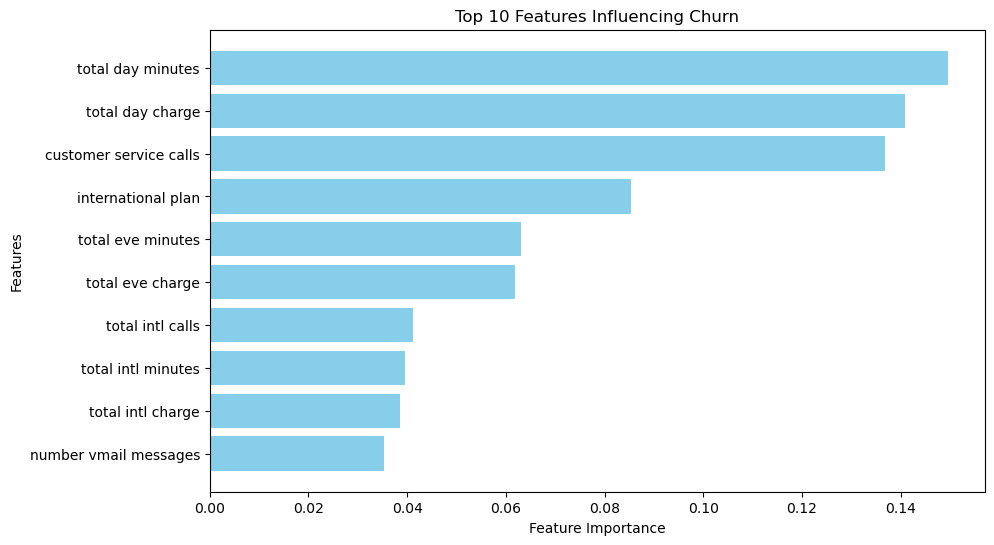

,Feature,Importance
0,total day minutes,0.149508
1,total day charge,0.140845
2,customer service calls,0.136748
3,international plan,0.085408
4,total eve minutes,0.063068
5,total eve charge,0.061907
6,total intl calls,0.041176
7,total intl minutes,0.039663
8,total intl charge,0.038462
9,number vmail messages,0.035295


In [40]:
import matplotlib.pyplot as plt
import numpy as np

# Extract feature importances from the Random Forest model
feature_importances = best_rf_model.feature_importances_
features = X.columns

# Create a sorted index for the most important features
sorted_idx = np.argsort(feature_importances)[::-1]

# Display the top 10 features
plt.figure(figsize=(10, 6))
plt.barh(features[sorted_idx][:10], feature_importances[sorted_idx][:10], color='skyblue')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Top 10 Features Influencing Churn')
plt.gca().invert_yaxis()
plt.show()

# Print feature importance values
important_features = pd.DataFrame({
    'Feature': features[sorted_idx],
    'Importance': feature_importances[sorted_idx]
})
important_features.head(10)

# Model Evaluation and Comparison

In [25]:
# Compare performance
print("Baseline Logistic Regression ROC-AUC:", roc_auc_score(y_test, y_pred_prob))
print("Random Forest ROC-AUC:", roc_auc_score(y_test, y_pred_rf_prob))

Baseline Logistic Regression ROC-AUC: 0.8136963097398667
Random Forest ROC-AUC: 0.9060213752772737


# Recommendations

## Findings
- The Random Forest model outperformed the baseline Logistic Regression in terms of ROC-AUC.
- Features like `customer service calls` and `international plan` were significant predictors of churn.

## Recommendations
- Target customers with high `customer service calls` for retention programs.
- Offer better international plans to retain customers flagged as high-risk by the model.